HEART DISEASE PREDICTION

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [2]:
#load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 
'target']

data = pd.read_csv(url, header=None, names=column_names)

print("First few rows of the dataset: ")
print(data.head())

First few rows of the dataset: 
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [3]:
#data cleaning
#replacing '?' with NaN and converting the columns to numeric
data = data.replace('?',np.nan)
data = data.apply(pd.to_numeric)

#check for missing values
print("\nMissing values in the dataset: ")
print(data.isnull().sum())


Missing values in the dataset: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [4]:
#Fill missing values with the median value of each column
data = data.fillna(data.median())

#Verify that there are no more missing values
print("\nMissing values after filling: ")
print(data.isnull().sum())


Missing values after filling: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
#EDA
print("\nStatistical summary of the dataset: ")
print(data.describe())


Statistical summary of the dataset: 
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0

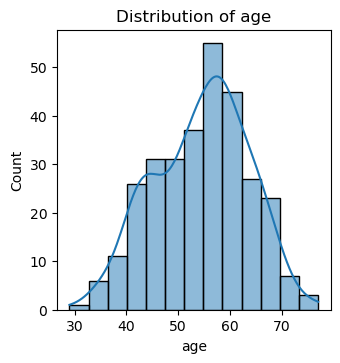

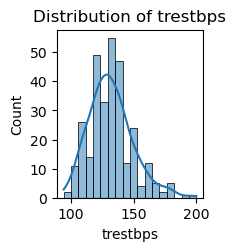

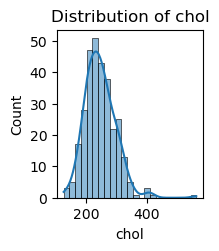

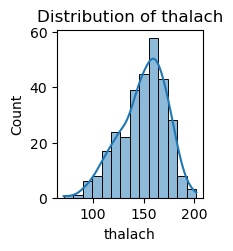

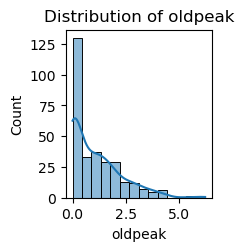

In [6]:
#Plotting distributions of numeric features
plt.figure(figsize=(12,8))
for i, column in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout
    plt.show()

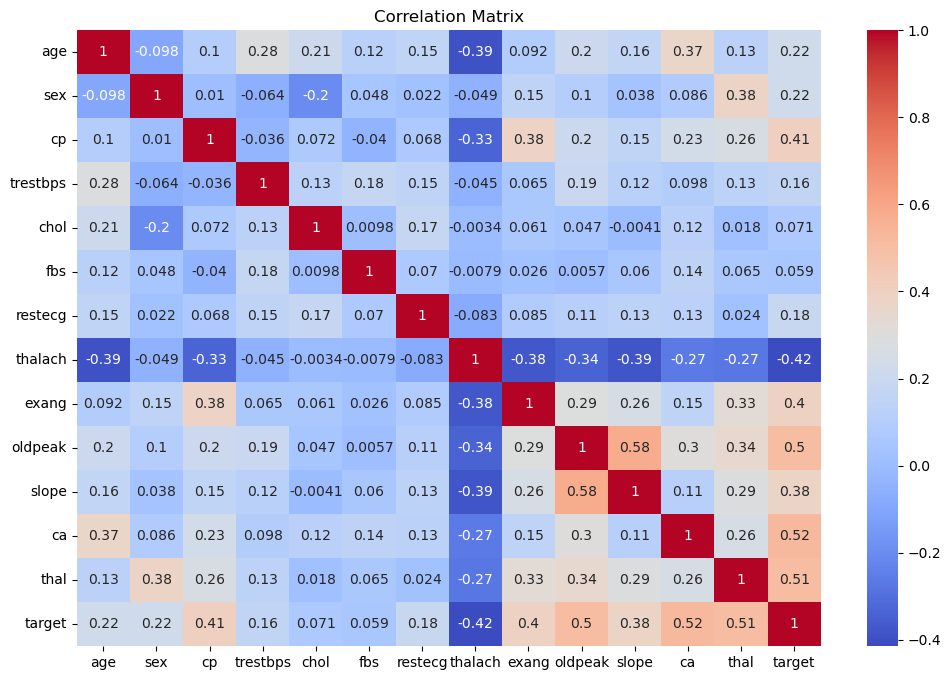

In [7]:
#correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
#convert target to binary classification : 0 (no disease) or 1 (disease) 
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

#Split the data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

#Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

#Model training and Evaluation
models = {'Logistic Regression' : LogisticRegression(),
          'Decision Tree' : DecisionTreeClassifier(),
          'Random Forest' : RandomForestClassifier(n_estimators=100)}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

#Evaluation Metrics
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    results.append((model_name, cm, cr, fpr, tpr, roc_auc))



Model: Logistic Regression
confusion Matrix: 
[[25  4]
 [ 3 29]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



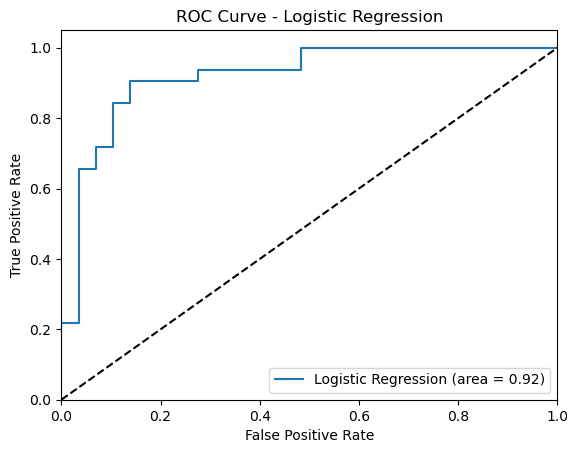


Model: Decision Tree
confusion Matrix: 
[[23  6]
 [10 22]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        29
           1       0.79      0.69      0.73        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



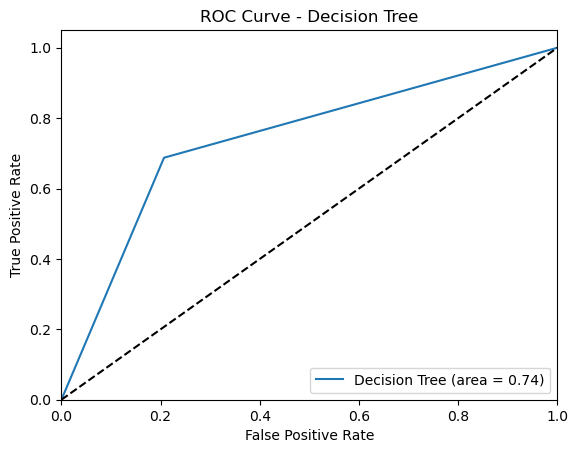


Model: Random Forest
confusion Matrix: 
[[28  1]
 [ 5 27]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



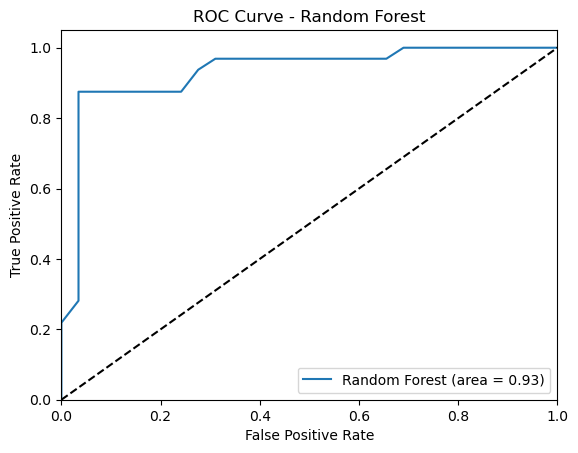

In [10]:
#Visualize the results
for model_name, cm, cr, fpr, tpr, roc_auc in results:
    print(f"\nModel: {model_name}")
    print("confusion Matrix: ")
    print(cm)
    print("\nClassification Report: ")
    print(cr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()